# Assignment 8, Part 2: Pandas

This notebook is based on the official `pandas` [documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html).  Unless otherwise credited, quoted text comes from this document.

`Pandas` is a Python package that we will use to manage labeled data.

***Note*** You might want to consider a quick review of the previous tutorial (Pandas Part1) before continuing.

## Instructions
This tutorial provides step-by-step training divided into numbered sections. The sections often contain embeded exectable code for demonstration.  This tutorial is accompanied by a practice notebook with the exact same name but with a `-Practice` suffix.  Throughout this tutorial sections labeled "Practice Task" are interspersed and indicated with the icon: ![Task](http://icons.iconarchive.com/icons/sbstnblnd/plateau/16/Apps-gnome-info-icon.png).
  You should follow the instructions provided in these sections by performing them in the practice notebook.  When the tutorial is completed you can turn in the final practice notebook. 


## 1. Getting Started

First, we need to import the pandas library (and Numpy library too).  All packages are imported at the top of the notebook. Execute the code in the following cell to get started with this notebook (type Ctrl+Enter in the cell below)


In [65]:
import pandas as pd
import numpy as np

For this tutorial we will use some of the data objects created in the previous Pandas Part 1 tutorial. Specifically these objects.

Recreate:
+ `df`:  a generic data frame containing two columns named "alpha" and "beta".
+ `iris_df`:  a data frame containing the imported iris dataset.

First, let's create the `df` object:

In [66]:
df = pd.DataFrame(
    {'alpha': [0, 1, 2, 3, 4],
     'beta': ['a', 'b', 'c', 'd', 'e']})

In [67]:
%matplotlib inline

Now let's read in the iris data.  It should be in a `data` directory inside the same directory as this notebook:

In [68]:
iris_df = pd.read_csv('data/iris.csv')

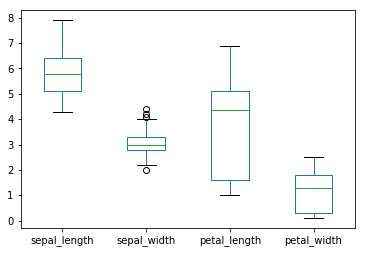

In [69]:
iris_df.plot.box()

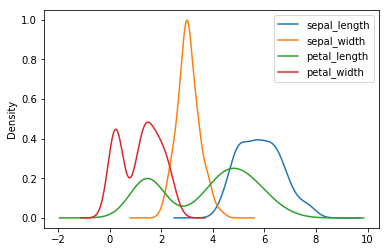

In [70]:
iris_df.plot.kde()

In [71]:
iris_df.plot.bar

<bound method FramePlotMethods.bar of <pandas.plotting._core.FramePlotMethods object at 0x0090ADD0>>

As a reminder, execute the following to view the `df` data frame

In [72]:
df

,alpha,beta
0,0,a
1,1,b
2,2,c
3,3,d
4,4,e


And let's review the `iris_df` data frame:

In [73]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Task 1a: Setup

<span style="float:right; margin-left:10px; clear:both;">![Task](http://icons.iconarchive.com/icons/sbstnblnd/plateau/96/Apps-gnome-info-icon.png)
</span>

Prepare the practice notebook:
- import pandas
- re-create the `df` data frame
- re-create the `iris_df` data frame


---
## 2. Setting values in a DataFrame object

We often want to change or assign data at specific rows, columns, indexes or slices.   

### 2.1. Inserting a New Column

A new column can be added by using a new label as an index to the data frame, and assigning values to it. Let's add a new column to the `df` object. The column will be named `gamma` and consist of a Series of 5 numbers. 

In [74]:
new_series = pd.Series([4, 3, 2, 1, 0])
df['gamma'] = new_series
df

,alpha,beta,gamma
0,0,a,4
1,1,b,3
2,2,c,2
3,3,d,1
4,4,e,0


Alternatively you can use a numpy array instead of a Seris

In [75]:
df['gamma'] = np.array([4, 3, 2, 1, 0])
df

,alpha,beta,gamma
0,0,a,4
1,1,b,3
2,2,c,2
3,3,d,1
4,4,e,0


If you use Numpy, the array of values provided must have the same number of values as there are rows in the data frame. Observe the effect if the list is too short:

In [1]:
df['gamma'] = np.array([4, 3, 2, 1])

NameError: name 'np' is not defined

Howevever with a Series NaN's are used to indicate missing values.  Let's add a new "epsilon" column that is **shorter** than the others:

In [77]:
df['epsilon'] = pd.Series([1, 2, 3])
df

,alpha,beta,gamma,epsilon
0,0,a,4,1.0
1,1,b,3,2.0
2,2,c,2,3.0
3,3,d,1,NaN
4,4,e,0,NaN


Observe the effect if a `pd.Series` object is **longer** than the other columns:

In [78]:
df['theta'] = pd.Series([0, 1, 3, 4, 5, 6])
df

,alpha,beta,gamma,epsilon,theta
0,0,a,4,1.0,0
1,1,b,3,2.0,1
2,2,c,2,3.0,3
3,3,d,1,NaN,4
4,4,e,0,NaN,5


The values in the Series that were beyond the length of the data frame were excluded.

It is also possible to overwrite existing columns.

In [79]:
df['gamma'] = pd.Series([1, 1, 1, 1, 1])
df

,alpha,beta,gamma,epsilon,theta
0,0,a,1,1.0,0
1,1,b,1,2.0,1
2,2,c,1,3.0,3
3,3,d,1,NaN,4
4,4,e,1,NaN,5


In contrast to adding new columns, adding a single new rows is not typically done.

**Why?**

`pd.Series` objects have indexes! When we add them, Pandas adds and aligns their values by their indexes. By default these are integer indexes.

#### Task 2a: Inserting Columns

<span style="float:right; margin-left:10px; clear:both;">![Task](http://icons.iconarchive.com/icons/sbstnblnd/plateau/96/Apps-gnome-info-icon.png)
</span>

Create a copy of `df`, and modify it:

+ add a new column to the `
+ select and set values using a boolean operator.

---
## 3. Missing Data

As shown in the previous section, missing values are represented as 'NaN' in the table display. You can test for missing values or add missing values using the Numpy `np.nan` value: 

> pandas primarily uses the value `np.nan` to represent missing data. It is by default not included in computations. See the [Missing Data section](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#missing-data).

You can read more about the special types of float objects that are `np.nan` and `np.inf` [here](https://docs.scipy.org/doc/numpy-1.13.0/user/misc.html).

The choice of what to do with missing data is specific to the analytic you are performing. Two common approaches are to drop rows (or columns) with missing data, or to impute (fill) the empty cells.  To explore this, first build a dataframe with missing values. An easy way to do this is to assign a series that is shorter than the rest to an existing dataframe.  First let's look again at the `df` data frame:

In [80]:
df

,alpha,beta,gamma,epsilon,theta
0,0,a,1,1.0,0
1,1,b,1,2.0,1
2,2,c,1,3.0,3
3,3,d,1,NaN,4
4,4,e,1,NaN,5


We introduced missing values when we added the "epsilon" column.  Let's remove all rows with any missing values:

In [81]:
df.dropna()

,alpha,beta,gamma,epsilon,theta
0,0,a,1,1.0,0
1,1,b,1,2.0,1
2,2,c,1,3.0,3


**Note**: By default, `dropna()` (and fair number of other functions) do not modify the data frame 'in place', rather they return a modified copy.  We did not store this modified data frame in another variable in the code above, so Python prints it.  Thus, observe that if we print the `df` object it remains intact.

In [82]:
df

,alpha,beta,gamma,epsilon,theta
0,0,a,1,1.0,0
1,1,b,1,2.0,1
2,2,c,1,3.0,3
3,3,d,1,NaN,4
4,4,e,1,NaN,5


If you would like to have the data frame change "in place", then you then have two choices:
+ Use the `dropna` function's `inplace=True` argument.
+ Assign the result, using the same name.
    `df = df.dropna()`

In some cases, setting missing values to some other value (such as 0) may be appropriate.  This can be accomplished using the `df.fillna()` function and passing in the desired value.  

In [83]:
df.fillna(0)

,alpha,beta,gamma,epsilon,theta
0,0,a,1,1.0,0
1,1,b,1,2.0,1
2,2,c,1,3.0,3
3,3,d,1,0.0,4
4,4,e,1,0.0,5


#### Task 3a: Missing Data

<span style="float:right; margin-left:10px; clear:both;">![Task](http://icons.iconarchive.com/icons/sbstnblnd/plateau/96/Apps-gnome-info-icon.png)
</span>

Create two new copies of the `df` dataframe:

+ One with the `NaN` values replaced with a value of your choice.
+ One with the rows with `NaN` values removed.

---
## 4. Operations

Pandas comes with functions that "operate" or act on on rows or columns. Some of these include calculating the mean, covariance, correlation, percent change, etc.

### 4.1 Mathematical Operations

To explore these operations, Let's review the `iris_df` data frame:

In [84]:
iris_df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
65,6.7,3.1,4.4,1.4,versicolor
122,7.7,2.8,6.7,2.0,virginica
112,6.8,3.0,5.5,2.1,virginica
60,5.0,2.0,3.5,1.0,versicolor
54,6.5,2.8,4.6,1.5,versicolor
33,5.5,4.2,1.4,0.2,setosa
115,6.4,3.2,5.3,2.3,virginica
44,5.1,3.8,1.9,0.4,setosa
140,6.7,3.1,5.6,2.4,virginica
67,5.8,2.7,4.1,1.0,versicolor


In [85]:
#mean of setosa data

iris_df[iris_df['species'] == 'setosa'].mean()

sepal_length    5.006
sepal_width     3.418
petal_length    1.464
petal_width     0.244
dtype: float64

In [86]:
#mean of versicolor data
iris_df[iris_df['species'] == 'versicolor'].mean()

sepal_length    5.936
sepal_width     2.770
petal_length    4.260
petal_width     1.326
dtype: float64

In [87]:
#mean ofvirginica data
iris_df[iris_df.loc[:, 'species'] == 'virginica'].mean()

sepal_length    6.588
sepal_width     2.974
petal_length    5.552
petal_width     2.026
dtype: float64

In [88]:
iris_df[iris_df.loc[:, 'species'] == 'virginica'].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.457228,0.864225,0.281108
sepal_width,0.457228,1.000000,0.401045,0.537728
petal_length,0.864225,0.401045,1.000000,0.322108
petal_width,0.281108,0.537728,0.322108,1.000000


to demonstrate the use of operation lets caculate the mean of each column.  The `df.mean()` provides this:

In [89]:
iris_df.mean()

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

In [90]:
iris_df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


Recall that we can call `help()` on an existing object, or its abstract form.

```python
help(pd.DataFrame.mean)
# Should be mostly the same as:
help(iris_df.mean)
```

For example:

In [91]:
help(pd.DataFrame.mean)

Help on function mean in module pandas.core.frame:

mean(self, axis=None, skipna=None, level=None, numeric_only=None, **kwargs)
    Return the mean of the values for the requested axis.
    
    Parameters
    ----------
    axis : {index (0), columns (1)}
        Axis for the function to be applied on.
    skipna : bool, default True
        Exclude NA/null values when computing the result.
    level : int or level name, default None
        If the axis is a MultiIndex (hierarchical), count along a
        particular level, collapsing into a Series.
    numeric_only : bool, default None
        Include only float, int, boolean columns. If None, will attempt to use
        everything, then use only numeric data. Not implemented for Series.
    **kwargs
        Additional keyword arguments to be passed to the function.
    
    Returns
    -------
    mean : Series or DataFrame (if level specified)



According to the help instructions returned by the previous line of code, how can we calculate the mean of the rows rather than the columns?  

The answer is by providing an appropriate argument.

In [92]:
iris_df.mean(1).head()

0    2.550
1    2.375
2    2.350
3    2.350
4    2.550
dtype: float64

#### Task 4a: Operations

<span style="float:right; margin-left:10px; clear:both;">![Task](http://icons.iconarchive.com/icons/sbstnblnd/plateau/96/Apps-gnome-info-icon.png)
</span>

View the [Computational tools](https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html) and [statistical methods](https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html#method-summary) documentation.
Using the list of operational functions choose 5 to practice using the iris data frame.


### 4.2 Apply

Another common operation is the ability to apply another function to a set of rows or columns (or a subset created from slicing). To efficiently apply functions in this way there is the `df.apply` method.

Here is an exceprt from the `df.apply` documentation:

```python
apply(func, axis=0, broadcast=None, raw=False, reduce=None, result_type=None, args=(), **kwds)
```

You can see the full help documetnation with by executing the following line:

In [93]:
help(df.apply)

Help on method apply in module pandas.core.frame:

apply(func, axis=0, broadcast=None, raw=False, reduce=None, result_type=None, args=(), **kwds) method of pandas.core.frame.DataFrame instance
    Apply a function along an axis of the DataFrame.
    
    Objects passed to the function are Series objects whose index is
    either the DataFrame's index (``axis=0``) or the DataFrame's columns
    (``axis=1``). By default (``result_type=None``), the final return type
    is inferred from the return type of the applied function. Otherwise,
    it depends on the `result_type` argument.
    
    Parameters
    ----------
    func : function
        Function to apply to each column or row.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Axis along which the function is applied:
    
        * 0 or 'index': apply function to each column.
        * 1 or 'columns': apply function to each row.
    broadcast : bool, optional
        Only relevant for aggregation functions:
    
       

Observe that the first argument passed to `apply` is the function that should be "applied" to the data frame. As an exmaple, we can proivde the `print` function to print each of the columns separately:

In [94]:
# df.apply(print, axis=1)

We can use `apply` to find the the data type of each column using the the built-in function `type`:

In [95]:
df.apply(type, axis=1)

0    <class 'pandas.core.series.Series'>
1    <class 'pandas.core.series.Series'>
2    <class 'pandas.core.series.Series'>
3    <class 'pandas.core.series.Series'>
4    <class 'pandas.core.series.Series'>
dtype: object

We can use `apply` to calcualte the sum of each columns:

In [96]:
df.apply(np.sum, axis=0)

alpha         10
beta       abcde
gamma          5
epsilon        6
theta         13
dtype: object

**Note**: by default `apply` performs the supplied function across columns.  To apply the function across rows, use the `axis` argument (see the help for `apply` above).  

In [97]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Task 4b:  Apply

<span style="float:right; margin-left:10px; clear:both;">![Task](http://icons.iconarchive.com/icons/sbstnblnd/plateau/96/Apps-gnome-info-icon.png)
</span>

Practice using `apply` on either the `df` or `iris_df` data frames using any two functions of your choice.

## 4.3 Occurances

You can calculate the number of occurances for a set of values in a `pd.Series` object using the `value_counts` function.  These counts are similar to what you would see in a Histogram.  As an example, let's create a new series containing 10 random integers between 1 and 7. Then we will use `value_counts` to observe how many occurances there are of each integer.  First let's create the series:

In [98]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    0
1    1
2    2
3    6
4    2
5    6
6    0
7    6
8    6
9    5
dtype: int32

Now we'll use `value_counts` to create our "histogram" or occurances of each integer:

In [63]:
s.value_counts()

0    3
3    2
2    2
1    2
6    1
dtype: int64

#### Task 4c.  Occurances

<span style="float:right; margin-left:10px; clear:both;">![Task](http://icons.iconarchive.com/icons/sbstnblnd/plateau/96/Apps-gnome-info-icon.png)
</span>

Ientify the number of occurances for each species (virginica, versicolor, setosa) in the `iris_df` object.  *Hint*: the `value_counts` function only works on a `pd.Series` object, not on the full data frame.

## 5. String Methods

Many times data sets will have columns with string values that must be modified in some way, such as being split from one column to two, or vice versa. 

To demonstrate string methods, lets adjust the `df` object to add some strings.  As a reminder lets look at the df object:

In [99]:
df.head(2) 

,alpha,beta,gamma,epsilon,theta
0,0,a,1,1.0,0
1,1,b,1,2.0,1


As a reminder lets find the dimensions of this data frame:

In [100]:
df.shape

(5, 5)

To demonstrate let's create some lists of strings

In [102]:
labels = ['alpha', 'beta', 'gamma', 'delta']
more_labels = ['foxtrot', 'whiskey', 'omega','epsilon','startrek']

Next, we'll demonstrate use of the Numpy `np.random.choice` function to create two new columns for the `df` dataframe using randomized values from the two lists of strings we just created.  Take some time to make sure the following code is clear.

In [105]:
df['iota'] = np.random.choice(labels, df.shape[0])
df['kappa'] = np.random.choice(more_labels, df.shape[0])
df

,alpha,beta,gamma,epsilon,theta,iota,kappa
0,0,a,1,1.0,0,delta,foxtrot
1,1,b,1,2.0,1,gamma,startrek
2,2,c,1,3.0,3,beta,epsilon
3,3,d,1,NaN,4,alpha,startrek
4,4,e,1,NaN,5,beta,epsilon


**Reminder:** *Creating new columns with numpy arrays only works if they are of the same length as the existing dataframe. 

### 5.1 Combining Strings

Combining the strings from two different columns is easy!  For example, we can create a new column named `lambda` which contains the values of the `iota` and `kappa` columns by simply using the `+` operator.  We can include an underscore to separate the words:

In [107]:
df['lambda'] = df['iota'] + '_' + df['kappa']
df

,alpha,beta,gamma,epsilon,theta,iota,kappa,lambda
0,0,a,1,1.0,0,delta,foxtrot,delta_foxtrot
1,1,b,1,2.0,1,gamma,startrek,gamma_startrek
2,2,c,1,3.0,3,beta,epsilon,beta_epsilon
3,3,d,1,NaN,4,alpha,startrek,alpha_startrek
4,4,e,1,NaN,5,beta,epsilon,beta_epsilon


### 5.2 Splitting Columns

Before we split a column of strings into two different columns we must remember that each column in a data frame is a `pd.Series` object.  The `pd.Series` object has an attribute named `str`.  The `str` attribute is itself an object of type  `pandas.core.strings.StringMethods` and this object provides us with a variety of functions for working with the strings in the series... including a function named `split`. 

First, examine the `str` attribute of the `lambda` column of the data frame:

In [108]:
df['lambda'].str

Observe that it is an object.  We can therefore call its `split` function.  This function will iterate through each of the strings in the series and split them using the specified delimiter. 

In [109]:
df['lambda'].str.split('_')

0     [delta, foxtrot]
1    [gamma, startrek]
2      [beta, epsilon]
3    [alpha, startrek]
4      [beta, epsilon]
Name: lambda, dtype: object

Observe that each row of the `lambda` column was split and a new `pd.Series` was returned with each element a list of two strings. We now have the two strings we need for the two new columns!  

However, remember that the value returned from the `split` function is also a `pd.Series` object.  We need two new `pd.Series` objects (one for each new column) not one. So, we need to separate the list at each position into two separate `pd.Series` objects. We can do this by using the `str` attribute again.  To seprate the two elements into two new `pd.Series` objects we can simply assign the `str` attribute to two new variables. The values will automatically unpack: 

In [110]:
split_1, split_2 = df['lambda'].str.split('_', 1).str
split_1

0    delta
1    gamma
2     beta
3    alpha
4     beta
Name: lambda, dtype: object

Observe that the `split_1` variable is now a `pd.Seires` object that contains only the first values from each element. The `split_2` will be the second set of strings.  We can simplify all of this into a single line of code that automatically adds two new columns to the `df` dataframe:

In [111]:
df['split_1'], df['split_2'] = df['lambda'].str.split('_', 1).str
df

,alpha,beta,gamma,epsilon,theta,iota,kappa,lambda,split_1,split_2
0,0,a,1,1.0,0,delta,foxtrot,delta_foxtrot,delta,foxtrot
1,1,b,1,2.0,1,gamma,startrek,gamma_startrek,gamma,startrek
2,2,c,1,3.0,3,beta,epsilon,beta_epsilon,beta,epsilon
3,3,d,1,NaN,4,alpha,startrek,alpha_startrek,alpha,startrek
4,4,e,1,NaN,5,beta,epsilon,beta_epsilon,beta,epsilon


#### Task 5a: String Methods

<span style="float:right; margin-left:10px; clear:both;">![Task](http://icons.iconarchive.com/icons/sbstnblnd/plateau/96/Apps-gnome-info-icon.png)
</span>

Demonstrate the spliting and combination of columns.

+ Create your list of words, as shown above.
+ Combine two or more columns into one. *You can use string combinations, or do math on numeric columns.*
+ Split a column into two.


---
## 6. Combining DataFrames

Often it is useful to combine two or more dataframes wither by merging, joining, contenating or grouping.  We will explore each of these operations. 

***Note***: For a much more exahustive description of merging, joining and contatenation, and helpful diagrams, see the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html).

To demonstrate concatenation, lets use the iris data frame.  But first let's break it up into separate species-specific data frames, i.e. one dataframe per species.  We can use Fancy Indexing from the Pandas Part 1 tutorial to do this:

In [113]:
setosa_df = iris_df[iris_df['species'] == 'setosa']
versicolor_df = iris_df[iris_df['species'] == 'versicolor']
virginica_df = iris_df[iris_df['species'] == 'virginica']

Let's breifly peek at each dataframe to make sure we split them correctly:

In [114]:
setosa_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [115]:
setosa_df.shape

(50, 5)

In [116]:
versicolor_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor


In [117]:
versicolor_df.shape

(50, 5)

In [118]:
virginica_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica


In [119]:
virginica_df.shape

(50, 5)

Observe that each data frame is exactly 50 rows long and each one contains only the species specific data. Now, for the rest of this section, let's assume that we imported these iris species data as separate data frames.

### 6.1 Merging

Suppose now that we imported the species-specific iris data frames and we now want to merge them.  We can do this using the `pd.concat` function.  By default, the `pd.concat` function tries to merge data frames by combining the rows of each data frame one after the other.  This image from the Pandas documentation demonstrates the process:

![rows concat](https://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_basic.png)

The first argument that the `pd.concat` function accepts is a list of dataframes that should be merged. Therefore, we must first create a list of the individual data frames.

In [120]:
pieces = [setosa_df, versicolor_df, virginica_df]

We can now call `pd.concat` to merge the three data frames:

In [126]:
new_iris_df = pd.concat(pieces)
new_iris_df.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
137,6.4,3.1,5.5,1.8,virginica
132,6.4,2.8,5.6,2.2,virginica
118,7.7,2.6,6.9,2.3,virginica


In [127]:
new_iris_df.shape

(150, 5)

Observe that the `new_iris_df` data frame is now back to 150 rows!

In [128]:
new_iris_df.sample(4)

,sepal_length,sepal_width,petal_length,petal_width,species
113,5.7,2.5,5.0,2.0,virginica
135,7.7,3.0,6.1,2.3,virginica
74,6.4,2.9,4.3,1.3,versicolor
6,4.6,3.4,1.4,0.3,setosa


***Note***, the code above works because all the columns match.  What if the columns did not match To explore this consider the following data frames from the Pandas documentation:

In [132]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                    index=[2, 3, 6, 7])
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [133]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


Suppose we wanted to merge these two data frames?  Unlike the previous example we want to merge by concatnating columns rathar than rows.  To concatenate by colmns we can pass the `axis` argument. A value of `1` tells the funtion to concatenate by columns:

```python
  pd.concat([df1, df4], axis=1)
```

However, notice that each data frame has some columns in common, and some of the row indexes are in common, but both have some columns and rows that are not shared. How will `pd.concat` handle this? 

In [63]:
pd.concat([df1, df4], axis=1)

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


Observe that the columns of the two tables are set side-by-side, even though some of the columns have the same name, and rows with the same index between the two data frames are merged.  Any columns that are missing in one data frame will have missing values added in.

If we want to only include rows that have no missing values we can use the argument `join="inner"` to automatically remove them:

In [64]:
pd.concat([df1, df4], axis=1, join='inner')

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


### 6.2 Append

Adding rows to a dataframe is simple enough using the `append` function.  To demonstrate this, lets create a 4x6 data frame containing a collection of random numbers:

In [66]:
rand_df = pd.DataFrame(np.random.random((4, 6)))
rand_df

,0,1,2,3,4,5
0,0.585040,0.475937,0.996377,0.428293,0.705656,0.716217
1,0.243991,0.575264,0.444110,0.798268,0.899725,0.490200
2,0.916884,0.130717,0.399087,0.149539,0.765962,0.717301
3,0.457168,0.976240,0.204092,0.122226,0.387166,0.851608


Now suppose we want to append a new row to that data frame.  Let's create a new `pd.Series` object containing the same number of random numbers as there are columns in the data frame:

In [68]:
rand_row = pd.Series(np.random.random(6) * 100)

Now we an call the `append` function.  Unlike the `pd.concat` function, the `append` function belongs to the `pd.DataFrame` object.  The `append` function takes the new series as its first agument. We alsO pass the `ignore_index` argument set to `True`. This forces the append to renumber the row indexes.

In [69]:
rand_df.append(rand_row, ignore_index=True)

,0,1,2,3,4,5
0,0.585040,0.475937,0.996377,0.428293,0.705656,0.716217
1,0.243991,0.575264,0.444110,0.798268,0.899725,0.490200
2,0.916884,0.130717,0.399087,0.149539,0.765962,0.717301
3,0.457168,0.976240,0.204092,0.122226,0.387166,0.851608
4,19.135108,77.965100,58.625877,26.418879,89.759617,92.212528


***Note*** the `append` function does not alter 'in place' the `rand_df` data frame. Instead it returns a new data frame with the row appended.

There are more complex ways in which rows can be appended to data frames. Remember to view the [online documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html#pandas.DataFrame.append) in the future if your use cases are different from those shown here.

#### Task 6a: Concat and append data frames

<span style="float:right; margin-left:10px; clear:both;">![Task](http://icons.iconarchive.com/icons/sbstnblnd/plateau/96/Apps-gnome-info-icon.png)
</span>

Create two new dataframes and use them to demonstrate use of the following functions:

+ `pd.concat()`
+ `df.append()`


## 6.3 Grouping

Grouping using the `groupby` function of a `pd.DataFrame` object is a powerful sorting and subsetting tool of Pandas. The grouping performs three operations:  

- Splitting the data frame
- Applying a function
- Combining the results


This is best demonstrated with an example. Lets remind ourselves of the iris data frame:

In [137]:
iris_df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
17,5.1,3.5,1.4,0.3,setosa
79,5.7,2.6,3.5,1.0,versicolor
31,5.4,3.4,1.5,0.4,setosa
3,4.6,3.1,1.5,0.2,setosa
116,6.5,3.0,5.5,1.8,virginica


Suppose we want to know the mean width and length of each tissue (sepal and petal) for each species. We can create a new data frame that contains this information by "grouping".  Because we want to "collapse" our species data into a mean for each column, we want to group using the `species` column. If we run the `groupby` function using the species column we get the following:

In [141]:
iris_df.groupby('species')

Notice that the `groupBy` function returns a new object named `pandas.core.groupby.groupby.DataFrameGroupBy` or a `DataFrameGroupBy` object for short.  Lets re-run that command and save that object in a variable:

In [143]:
groups = iris_df.groupby('species')
type(groups)

pandas.core.groupby.generic.DataFrameGroupBy

What exactly is a `DataFrameGroupBy` object?  Lets dig in to find out what is happening here. Fortunately, this object allows us to iterate over its "groups".  Let's see what they are:

In [159]:
for group in groups:
    name, ndf = group
    print(name)
#     print(ndf)
    print(type(name))
    print(type(ndf))
    print(ndf.mean())
#     print(ndf)
#   print(type(group))
#   print(group)
    break

setosa
<class 'str'>
<class 'pandas.core.frame.DataFrame'>
sepal_length    5.006
sepal_width     3.418
petal_length    1.464
petal_width     0.244
dtype: float64


Observe that the groups are tubles.  Remember a tuple is like a list, but unlike a list,once it is created you can not change it. Tuples are represented using parentheses, `(` and `)`, rather than square brakets.  The first element of the tuple is the key. In the example printed above the key is `setosa`.  The second element of the tuple are the rows that belong to that group.   We learn from this, that the `DataFrameGroupBy`object is a list of tuples, where each tuple contains the rows of hte data frame that belong to the group.

Now that we have our groups we can apply a function and retreive a new data frame.  To get the mean we simply call `mean` on the groups object:

In [160]:
groups.mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


It is possible to have `groupby()` use more than one column to group. To demonstrate, let's suppose we took measurements of the iris sepal and petals at two different developmental stages: early and late flowering. We want to cacluate the mean for those two different periods.  In this case we would need to group by the `species` and by a new development stage column.  Let's create one by randomly assigning the development stage (of course in reality this data would be provided):

In [81]:
iris_df['dev_stage'] = np.random.choice(['early', 'late'], iris_df.shape[0])
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,dev_stage
0,5.1,3.5,1.4,0.2,setosa,early
1,4.9,3.0,1.4,0.2,setosa,early
2,4.7,3.2,1.3,0.2,setosa,late
3,4.6,3.1,1.5,0.2,setosa,early
4,5.0,3.6,1.4,0.2,setosa,late


Now let's group by both `species` and `dev_stage` and calcualte the mean:

In [82]:
groups = iris_df.groupby(['species', 'dev_stage'])
groups.mean()

sepal_length  sepal_width  petal_length  petal_width
species    dev_stage                                                      
setosa     early          4.995238     3.352381      1.438095     0.238095
           late           5.013793     3.465517      1.482759     0.248276
versicolor early          5.925000     2.754167      4.266667     1.354167
           late           5.946154     2.784615      4.253846     1.300000
virginica  early          6.586667     3.030000      5.576667     2.080000
           late           6.590000     2.890000      5.515000     1.945000

#### Task 6b: Grouping

<span style="float:right; margin-left:10px; clear:both;">![Task](http://icons.iconarchive.com/icons/sbstnblnd/plateau/96/Apps-gnome-info-icon.png)
</span>

Demonstrate a `groupby`.

+ Create a new column with the label `region` in the iris data frame. This column will indicates geographic regions of the US where measurments were taken. Values should include:  'Southeast', 'Northeast', 'Midwest', 'SouthWest', 'Pacific Northwest. (These can be randomly assigned).
+ Use `groupby` to get a new data frame of means for each species in each region.
+ Add the `dev_stage` column using the commands shown in section 6.3
+ Use `groupby` to get a new data frame of means for each species,in each region and each development stage.
+ Use the `count` function (just like you used the `mean` function) to identify how many rows in the table belong to each combination of species + region + developmental stage.

In [165]:
iris_df['region'] = np.random.choice(['Southeast', 'Northeast', 'Midwest', 'SouthWest', 'Pacific Northwest'], iris_df.shape[0])
iris_df['dev_stage'] = np.random.choice(['early', 'late'], iris_df.shape[0])
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,region,dev_stage
0,5.1,3.5,1.4,0.2,setosa,Southeast,late
1,4.9,3.0,1.4,0.2,setosa,Southeast,late
2,4.7,3.2,1.3,0.2,setosa,Pacific Northwest,early
3,4.6,3.1,1.5,0.2,setosa,Southeast,late
4,5.0,3.6,1.4,0.2,setosa,Midwest,late


In [208]:
group1 = iris_df.groupby(['species', 'region'])

In [209]:
group1.mean()

sepal_length  sepal_width  petal_length  \
species    region                                                       
setosa     Midwest                5.150000     3.516667      1.450000   
           Northeast              4.840000     3.240000      1.440000   
           Pacific Northwest      4.987500     3.462500      1.425000   
           SouthWest              5.050000     3.566667      1.550000   
           Southeast              4.952632     3.336842      1.468421   
versicolor Midwest                5.883333     2.950000      4.283333   
           Northeast              5.740000     2.740000      4.040000   
           Pacific Northwest      6.091667     2.758333      4.366667   
           SouthWest              5.983333     2.791667      4.300000   
           Southeast              5.920000     2.680000      4.290000   
virginica  Midwest                6.866667     3.016667      5.866667   
           Northeast              6.685714     2.971429      5.728571   
           Pacific Northwest      6.440000     2.930000      5.370000   
           SouthWest              6.550000     3.050000      5.316667   
           Southeast              6.492857     2.957143      5.471429   

                              petal_width  
species    region                          
setosa     Midwest               0.225000  
           Northeast             0.240000  
           Pacific Northwest     0.250000  
           SouthWest             0.350000  
           Southeast             0.221053  
versicolor Midwest               1.416667  
           Northeast             1.270000  
           Pacific Northwest     1.366667  
           SouthWest             1.308333  
           Southeast             1.300000  
virginica  Midwest               2.150000  
           Northeast             2.028571  
           Pacific Northwest     2.010000  
           SouthWest             1.933333  
           Southeast             2.021429

In [210]:
group2 = iris_df.groupby(['species', 'region', 'dev_stage'])

In [212]:
group2.mean()

sepal_length  sepal_width  \
species    region            dev_stage                              
setosa     Midwest           early          5.183333     3.583333   
                             late           5.116667     3.450000   
           Northeast         early          4.800000     3.200000   
                             late           4.900000     3.300000   
           Pacific Northwest early          5.200000     3.600000   
                             late           4.860000     3.380000   
           SouthWest         early          5.050000     3.650000   
                             late           5.050000     3.525000   
           Southeast         early          4.900000     3.312500   
                             late           4.990909     3.354545   
versicolor Midwest           early          6.266667     3.166667   
                             late           5.500000     2.733333   
           Northeast         early          5.633333     2.666667   
                             late           5.785714     2.771429   
           Pacific Northwest early          6.016667     2.750000   
                             late           6.166667     2.766667   
           SouthWest         early          5.933333     2.666667   
                             late           6.033333     2.916667   
           Southeast         early          6.033333     2.800000   
                             late           5.750000     2.500000   
virginica  Midwest           early          6.866667     2.800000   
                             late           6.866667     3.233333   
           Northeast         early          7.083333     3.083333   
                             late           6.387500     2.887500   
           Pacific Northwest early          6.642857     3.000000   
                             late           5.966667     2.766667   
           SouthWest         late           6.550000     3.050000   
           Southeast         early          6.340000     3.080000   
                             late           6.577778     2.888889   

                                        petal_length  petal_width  
species    region            dev_stage                             
setosa     Midwest           early          1.466667     0.200000  
                             late           1.433333     0.250000  
           Northeast         early          1.466667     0.200000  
                             late           1.400000     0.300000  
           Pacific Northwest early          1.466667     0.200000  
                             late           1.400000     0.280000  
           SouthWest         early          1.750000     0.500000  
                             late           1.450000     0.275000  
           Southeast         early          1.500000     0.200000  
                             late           1.445455     0.236364  
versicolor Midwest           early          4.433333     1.466667  
                             late           4.133333     1.366667  
           Northeast         early          3.733333     1.200000  
                             late           4.171429     1.300000  
           Pacific Northwest early          4.333333     1.316667  
                             late           4.400000     1.416667  
           SouthWest         early          4.216667     1.250000  
                             late           4.383333     1.366667  
           Southeast         early          4.350000     1.333333  
                             late           4.200000     1.250000  
virginica  Midwest           early          6.000000     2.066667  
                             late           5.733333     2.233333  
           Northeast         early          5.950000     2.083333  
                             late           5.562500     1.987500  
           Pacific Northwest early          5.557143     2.085714  
                             late           4.933333     1.83333

In [233]:
group2.count()

sepal_length  sepal_width  \
species    region            dev_stage                              
setosa     Midwest           early                 6            6   
                             late                  6            6   
           Northeast         early                 3            3   
                             late                  2            2   
           Pacific Northwest early                 3            3   
                             late                  5            5   
           SouthWest         early                 2            2   
                             late                  4            4   
           Southeast         early                 8            8   
                             late                 11           11   
versicolor Midwest           early                 3            3   
                             late                  3            3   
           Northeast         early                 3            3   
                             late                  7            7   
           Pacific Northwest early                 6            6   
                             late                  6            6   
           SouthWest         early                 6            6   
                             late                  6            6   
           Southeast         early                 6            6   
                             late                  4            4   
virginica  Midwest           early                 3            3   
                             late                  3            3   
           Northeast         early                 6            6   
                             late                  8            8   
           Pacific Northwest early                 7            7   
                             late                  3            3   
           SouthWest         late                  6            6   
           Southeast         early                 5            5   
                             late                  9            9   

                                        petal_length  petal_width  
species    region            dev_stage                             
setosa     Midwest           early                 6            6  
                             late                  6            6  
           Northeast         early                 3            3  
                             late                  2            2  
           Pacific Northwest early                 3            3  
                             late                  5            5  
           SouthWest         early                 2            2  
                             late                  4            4  
           Southeast         early                 8            8  
                             late                 11           11  
versicolor Midwest           early                 3            3  
                             late                  3            3  
           Northeast         early                 3            3  
                             late                  7            7  
           Pacific Northwest early                 6            6  
                             late                  6            6  
           SouthWest         early                 6            6  
                             late                  6            6  
           Southeast         early                 6            6  
                             late                  4            4  
virginica  Midwest           early                 3            3  
                             late                  3            3  
           Northeast         early                 6            6  
                             late                  8            8  
           Pacific Northwest early                 7            7  
                             late                  3            